<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/LAX%2BSanDiego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOS ANGELES COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['1-LosAngeles.csv']), index_col='Date',parse_dates=True)
print(RealData_df)

Saving 1-LosAngeles.csv to 1-LosAngeles (1).csv
            Los Angeles
Date                   
2000-01-31     217845.0
2000-02-29     217955.0
2000-03-31     218949.0
2000-04-30     220752.0
2000-05-31     222995.0
...                 ...
NaT                 NaN
NaT                 NaN
NaT                 NaN
NaT                 NaN
NaT                 NaN

[999 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Los Angeles
Date,
2000-01-31,217845.0
2000-02-29,217955.0
2000-03-31,218949.0
2000-04-30,220752.0
2000-05-31,222995.0
...,...
2021-12-31,823503.0
2022-01-31,828703.0
2022-02-28,837172.0


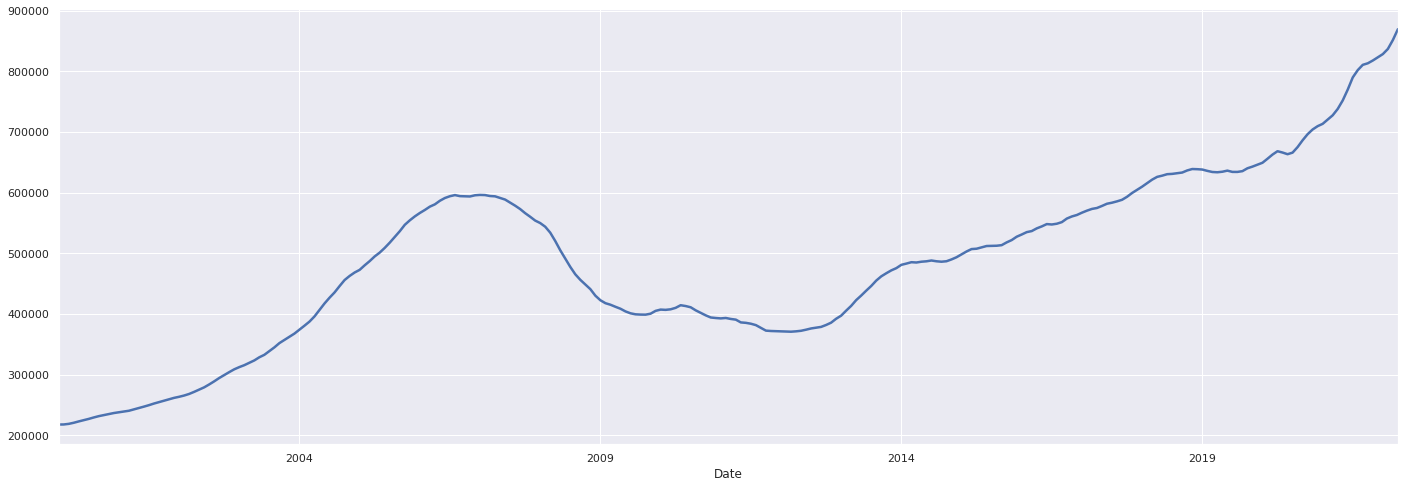

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Los Angeles'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Los Angeles'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


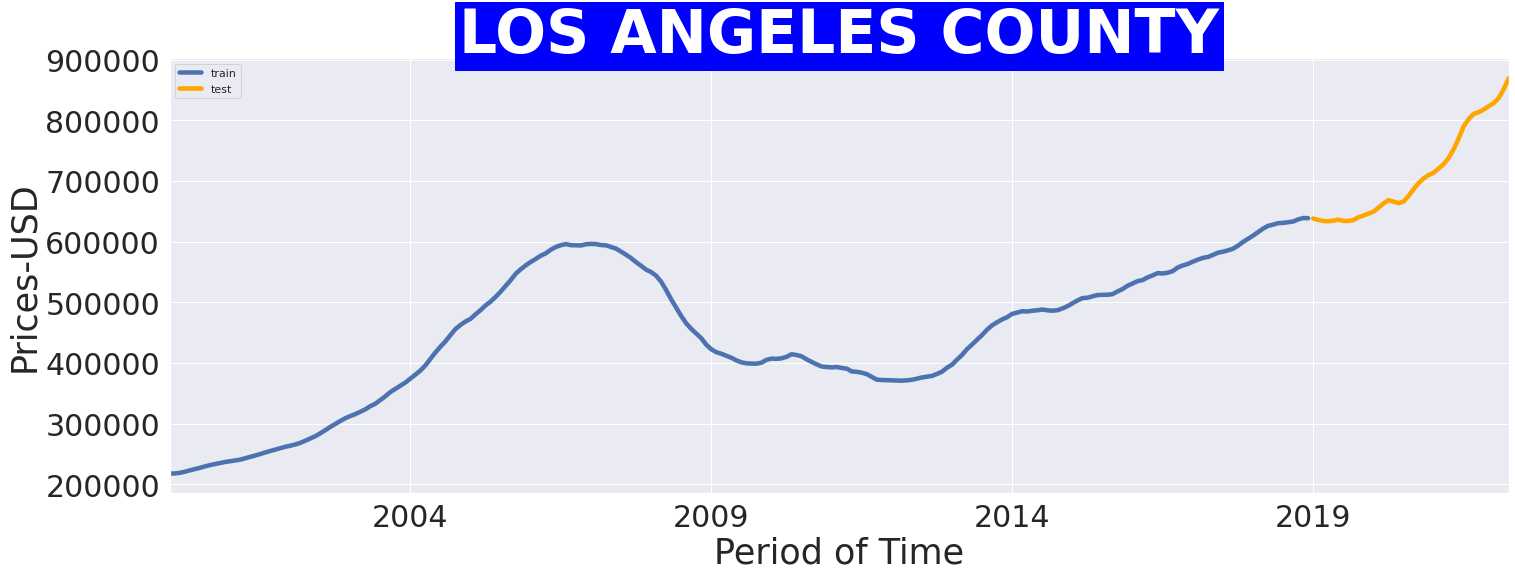

In [ ]:
RealData_df['Los Angeles'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Los Angeles'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("LOS ANGELES COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 17ms/step - loss: 0.1914 - mean_absolute_error: 0.3669 - val_loss: 0.5565 - val_mean_absolute_error: 0.7160
Epoch 2/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0399 - mean_absolute_error: 0.1590 - val_loss: 0.0135 - val_mean_absolute_error: 0.0983
Epoch 3/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0357 - val_loss: 0.0079 - val_mean_absolute_error: 0.0693
Epoch 4/60
46/46 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0312 - val_loss: 0.0072 - val_mean_absolute_error: 0.0653
Epoch 5/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0305 - val_loss: 0.0074 - val_mean_absolute_error: 0.0660
Epoch 6/60
46/46 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0302 - val_loss: 0.0033 - val_mean_absolute_error: 0.0449
Epoch 7/60
46/46 [=========

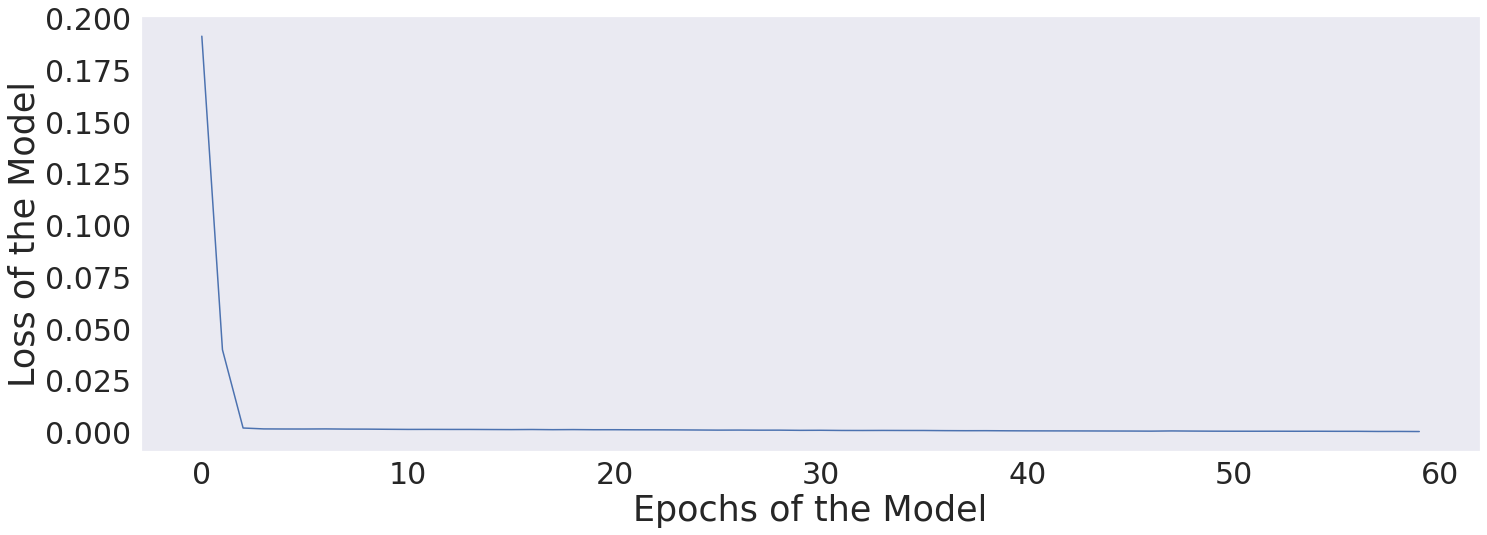

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.98274153, 0.97403157, 0.97374547, 0.98000246, 0.99030805,
       0.97437644, 0.97708774, 0.9853339 , 1.0138279 , 1.0247366 ,
       1.0415219 , 1.0571699 , 1.095146  , 1.1300877 , 1.1565903 ,
       1.1353271 , 1.1205577 , 1.1407611 , 1.1956466 , 1.2554064 ,
       1.3055447 , 1.3430933 , 1.368941  , 1.3871351 , 1.4274764 ,
       1.4644645 , 1.5230714 , 1.6003352 , 1.6985898 , 1.8072432 ,
       1.867259  , 1.9126986 , 1.9235528 , 1.9497386 , 1.9797913 ,
       2.0083885 , 2.0564027 , 2.1397815 ], dtype=float32)

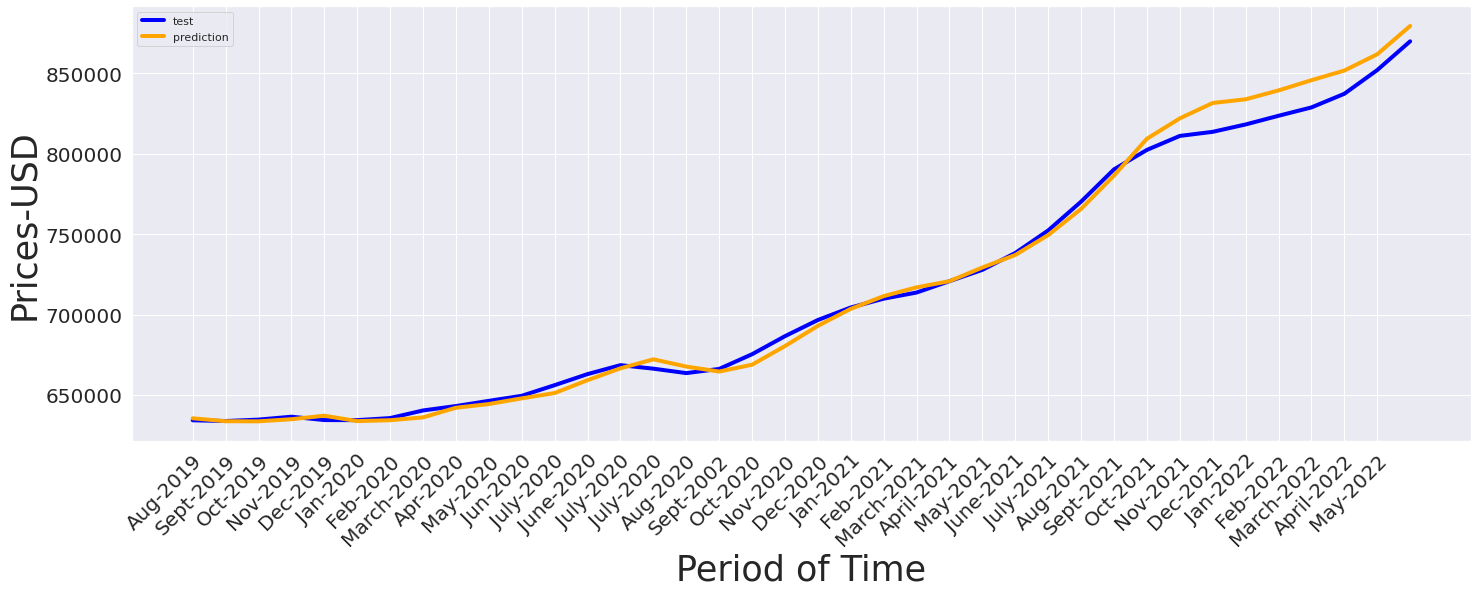

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

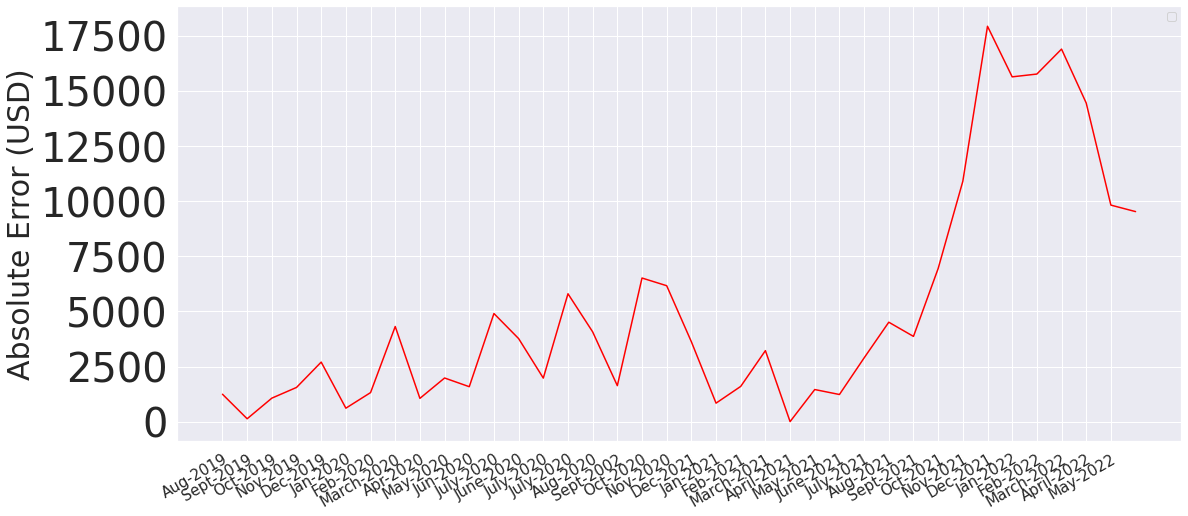

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(18,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.yticks(fontsize=40)
plt.xticks(fontsize=15)
#plt.grid()

In [ ]:
y_pred_inv

array([[635543.2 ],
       [633708.3 ],
       [633648.06],
       [634966.2 ],
       [637137.2 ],
       [633780.94],
       [634352.1 ],
       [636089.3 ],
       [642092.06],
       [644390.2 ],
       [647926.3 ],
       [651222.8 ],
       [659223.06],
       [666584.2 ],
       [672167.44],
       [667687.94],
       [664576.5 ],
       [668832.7 ],
       [680395.3 ],
       [692984.7 ],
       [703547.2 ],
       [711457.44],
       [716902.7 ],
       [720735.6 ],
       [729234.1 ],
       [737026.4 ],
       [749372.9 ],
       [765649.8 ],
       [786348.8 ],
       [809238.5 ],
       [821881.8 ],
       [831454.5 ],
       [833741.06],
       [839257.56],
       [845588.7 ],
       [851613.2 ],
       [861728.2 ],
       [879293.4 ]], dtype=float32)

# **SAN DIEGO COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['San_Diego.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving San_Diego.csv to San_Diego (2).csv
            San Diego County
Dates                       
2000-01-31            229358
2000-02-29            230607
2000-03-31            231959
2000-04-30            234974
2000-05-31            237865
...                      ...
2021-12-31            839270
2022-01-31            859886
2022-02-28            880373
2022-03-31            903779
2022-04-30            923350

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,San Diego County
Dates,
2000-01-31,229358
2000-02-29,230607
2000-03-31,231959
2000-04-30,234974
2000-05-31,237865
...,...
2021-12-31,839270
2022-01-31,859886
2022-02-28,880373


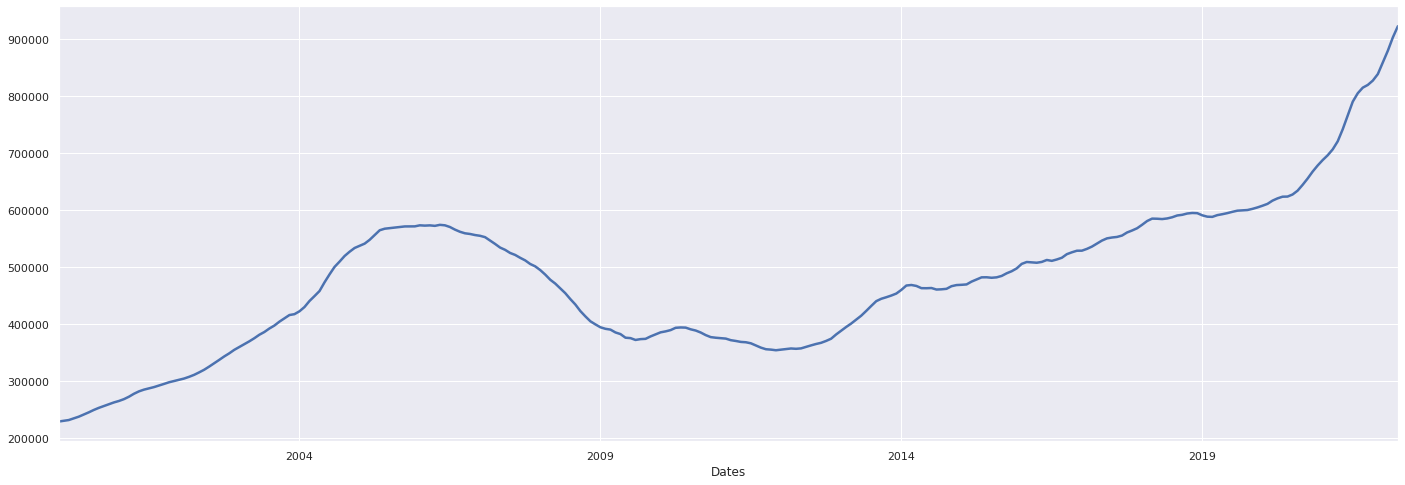

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['San Diego County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['San Diego County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


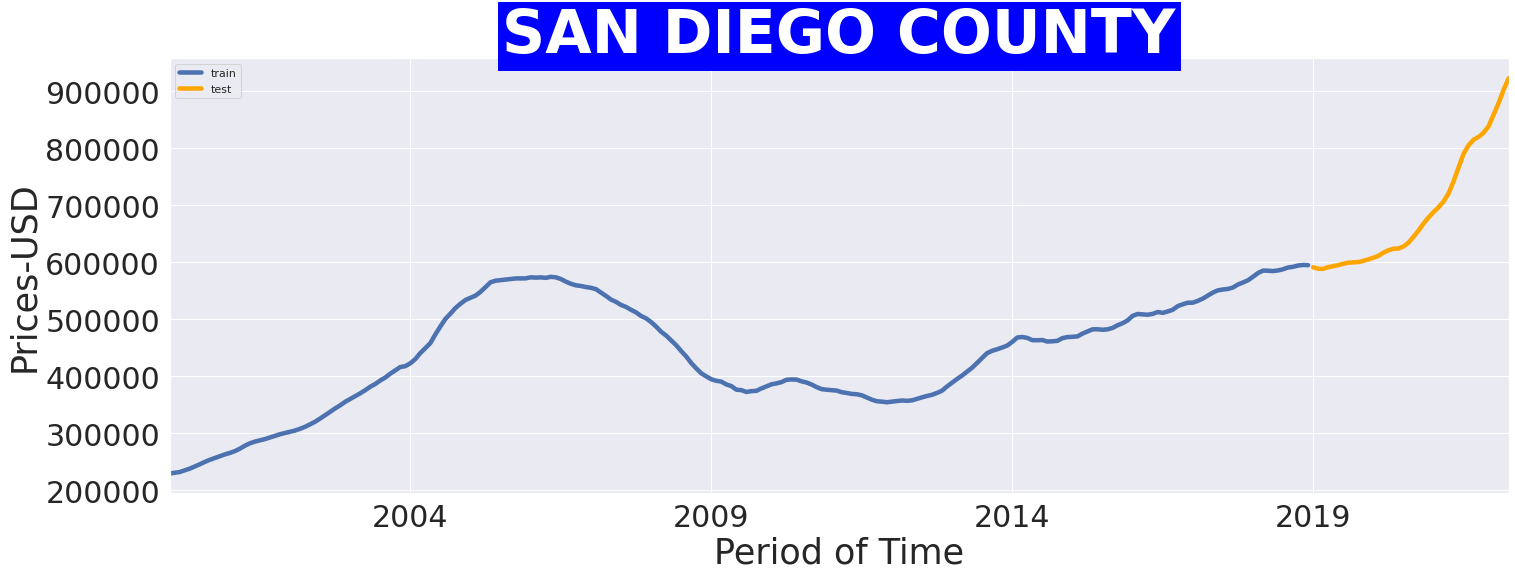

In [ ]:
RealData_df['San Diego County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['San Diego County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SAN DIEGO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 29ms/step - loss: 5.4339e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0038 - val_mean_absolute_error: 0.0378
Epoch 2/60
46/46 [==============================] - 0s 6ms/step - loss: 5.3523e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0066 - val_mean_absolute_error: 0.0571
Epoch 3/60
46/46 [==============================] - 0s 6ms/step - loss: 4.8209e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0014 - val_mean_absolute_error: 0.0275
Epoch 4/60
46/46 [==============================] - 0s 7ms/step - loss: 4.7371e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0029 - val_mean_absolute_error: 0.0331
Epoch 5/60
46/46 [==============================] - 0s 7ms/step - loss: 5.3130e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0032 - val_mean_absolute_error: 0.0341
Epoch 6/60
46/46 [==============================] - 0s 7ms/step - loss: 4.6548e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0070 - val_mean_absolute_error: 0.0608
Epo

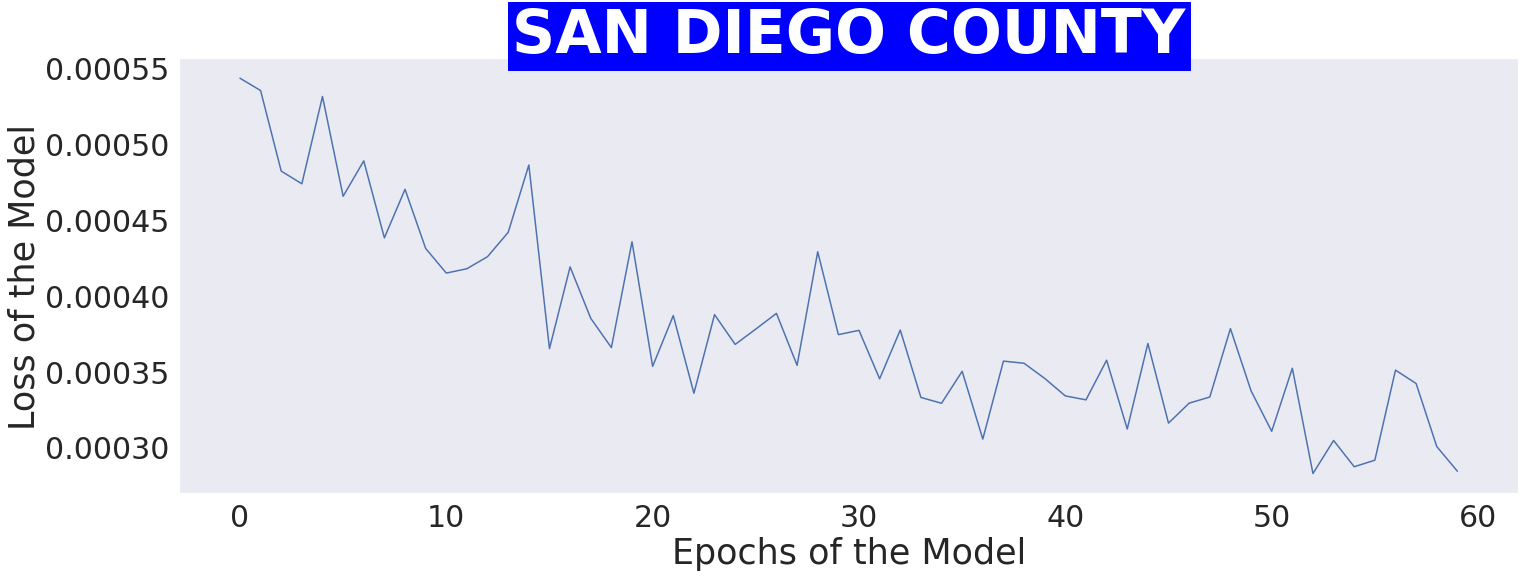

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SAN DIEGO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.9641501 , 0.96933407, 0.99908173, 1.0032715 , 1.0148631 ,
       1.0292772 , 1.0396476 , 1.0379039 , 1.0410862 , 1.0578115 ,
       1.073968  , 1.0923746 , 1.1119169 , 1.1523181 , 1.1691748 ,
       1.1826391 , 1.1754221 , 1.2066989 , 1.2547442 , 1.3227632 ,
       1.388073  , 1.4593192 , 1.5156476 , 1.566066  , 1.6111205 ,
       1.6732907 , 1.760218  , 1.8899797 , 2.0263984 , 2.152628  ,
       2.216867  , 2.2619448 , 2.2809517 , 2.3241    , 2.38767   ,
       2.5022192 , 2.6041188 , 2.7212691 ], dtype=float32)

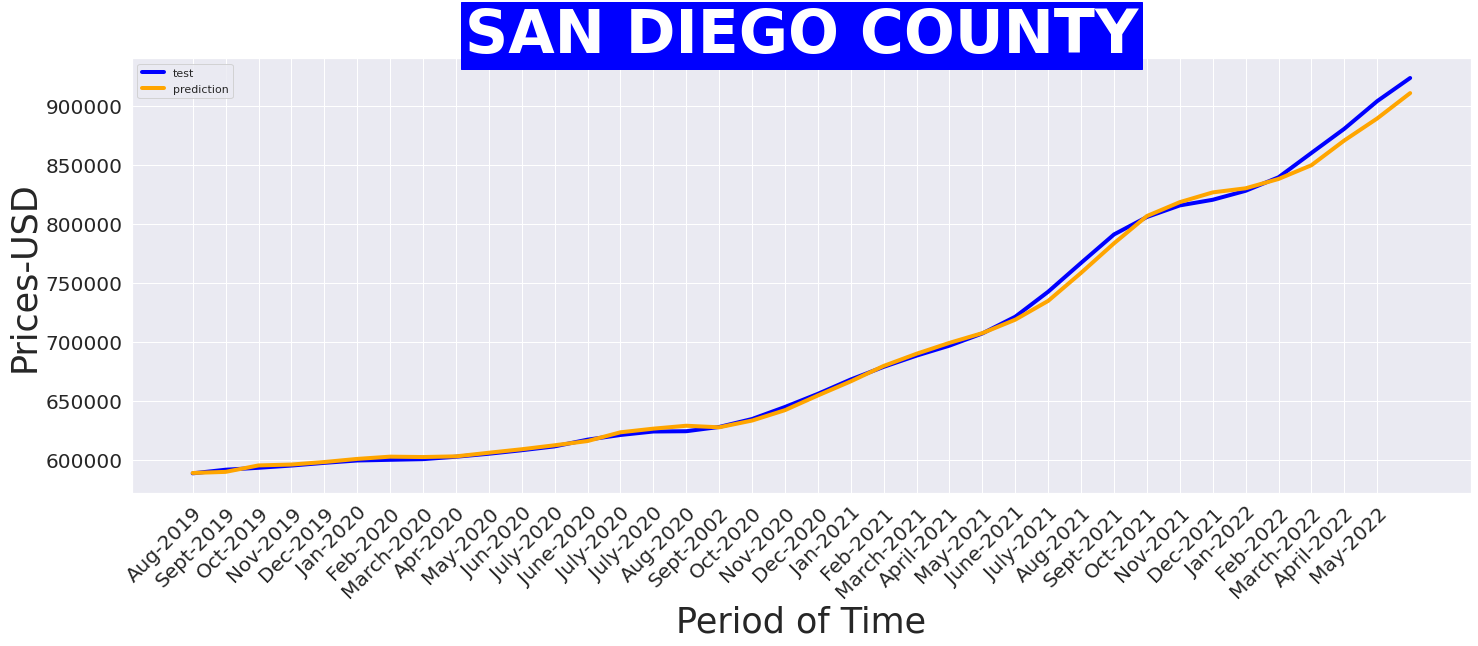

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("SAN DIEGO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SAN DIEGO COUNTY')

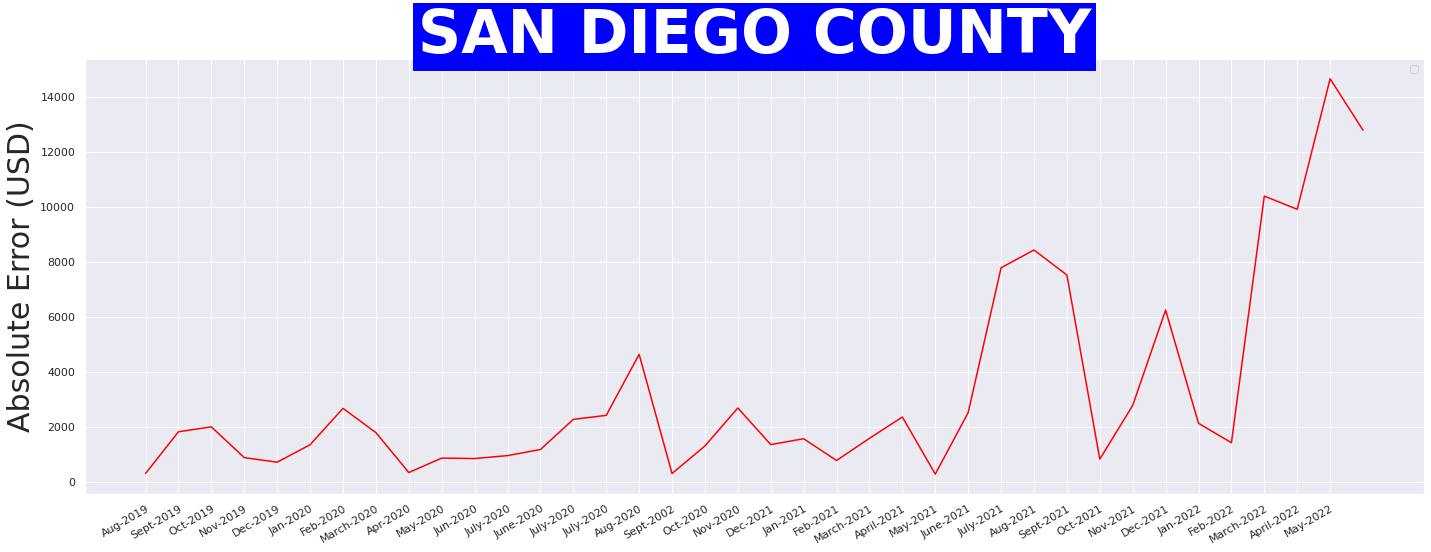

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SAN DIEGO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[588908.44],
       [589857.4 ],
       [595302.9 ],
       [596069.9 ],
       [598191.8 ],
       [600830.4 ],
       [602728.75],
       [602409.56],
       [602992.1 ],
       [606053.8 ],
       [609011.3 ],
       [612380.75],
       [615958.1 ],
       [623353.8 ],
       [626439.56],
       [628904.3 ],
       [627583.1 ],
       [633308.56],
       [642103.56],
       [654554.94],
       [666510.3 ],
       [679552.4 ],
       [689863.7 ],
       [699093.06],
       [707340.56],
       [718721.25],
       [734633.8 ],
       [758387.56],
       [783359.94],
       [806467.  ],
       [818226.4 ],
       [826478.2 ],
       [829957.56],
       [837856.06],
       [849493.  ],
       [870461.94],
       [889115.4 ],
       [910560.5 ]], dtype=float32)